modifying use of Elise's hakai comparison notebook


In [16]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [17]:
import salishsea_tools

In [20]:
from salishsea_tools import 

<module 'salishsea_tools' from '/ocean/tjarniko/MEOPAR/tools/SalishSeaTools/salishsea_tools/__init__.py'>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import isfile
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import viz_tools, geo_tools, evaltools as et
import glob
import gsw
import pytz
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates

mpl.rc('xtick', labelsize=16)
mpl.rc('ytick', labelsize=16)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=16)
mpl.rc('figure', titlesize=16)
mpl.rc('font', size=16)

%matplotlib inline

ImportError: cannot import name 'evaltools'

In [3]:
fc = pd.read_csv('/ocean/eolson/MEOPAR/obs/Hakai/Dosser20180911/ctd-bulk-1536702711696.csv',
                usecols=['Cast PK','Cruise','Station', 'Drop number','Start time', 'Bottom time',
                         'Latitude', 'Longitude', 'Depth (m)', 'Temperature (deg C)', 'Temperature flag', 'Pressure (dbar)',
                         'Pressure flag', 'PAR', 'PAR flag', 'Fluorometry Chlorophyll (ug/L)', 'Fluorometry Chlorophyll flag',
                         'Turbidity (FTU)', 'Turbidity flag',
                         'Salinity (PSU)', 'Salinity flag'],
                dtype={'Drop number':np.float64,'PAR flag':str,'Fluorometry Chlorophyll flag':str},na_values='null')

In [4]:
## fix apparent typos:
# reversed lats and lons
iii=fc['Latitude']>90
lons=-1*fc.loc[iii,'Latitude'].values
lats=-1*fc.loc[iii,'Longitude'].values
fc.loc[iii,'Longitude']=lons
fc.loc[iii,'Latitude']=lats

# remove data with missing lats and lons
nans=fc.loc[(fc['Latitude'].isnull())|(fc['Longitude'].isnull())]
fc=fc.drop(nans.index)

# apparently bad lats/lons
QU16bad=fc.loc[(fc['Station']=='QU16')&(fc['Latitude']>50.3)]
fc=fc.drop(QU16bad.index)
QU36bad=fc.loc[(fc['Station']=='QU36')&(fc['Latitude']>50.2)]
fc=fc.drop(QU36bad.index)
QU37bad=fc.loc[(fc['Station']=='QU37')&(fc['Longitude']<-125.1)]
fc=fc.drop(QU37bad.index)
QU38bad=fc.loc[(fc['Station']=='QU38')&(fc['Longitude']>-125.2)]
fc=fc.drop(QU38bad.index)
QU5bad=fc.loc[(fc['Station']=='QU5')&(fc['Longitude']>-125.18)]
fc=fc.drop(QU5bad.index)
#np.unique(fc.loc[(fc['Station']==sta)&(fc['Longitude']>-125.18)]['Cruise'].values)

In [5]:
fc.head()

,Cast PK,Cruise,Station,Drop number,Start time,Bottom time,Latitude,Longitude,Depth (m),Temperature (deg C),...,Pressure (dbar),Pressure flag,PAR,PAR flag,Fluorometry Chlorophyll (ug/L),Fluorometry Chlorophyll flag,Turbidity (FTU),Turbidity flag,Salinity (PSU),Salinity flag
0,1,QOM A,QU40,1.0,2015-11-03 12:37:20.000,2015-11-03 12:41:03.000,50.092435,-125.164387,0.991,10.6879,...,1,NaN,232.550,NaN,0.28830,NaN,0.742,NaN,28.1286,NaN
1,1,QOM A,QU40,1.0,2015-11-03 12:37:20.000,2015-11-03 12:41:03.000,50.092435,-125.164387,1.983,10.8076,...,2,NaN,146.550,NaN,0.36906,NaN,0.827,NaN,28.2369,NaN
2,1,QOM A,QU40,1.0,2015-11-03 12:37:20.000,2015-11-03 12:41:03.000,50.092435,-125.164387,2.974,10.8952,...,3,NaN,108.020,NaN,0.45831,NaN,0.742,NaN,28.3184,NaN
3,1,QOM A,QU40,1.0,2015-11-03 12:37:20.000,2015-11-03 12:41:03.000,50.092435,-125.164387,3.966,10.9617,...,4,NaN,92.601,NaN,0.49377,NaN,0.776,NaN,28.3926,NaN
4,1,QOM A,QU40,1.0,2015-11-03 12:37:20.000,2015-11-03 12:41:03.000,50.092435,-125.164387,4.957,11.0704,...,5,NaN,81.387,NaN,0.57567,NaN,0.718,NaN,28.5540,NaN


In [6]:
fc.keys()

Index(['Cast PK', 'Cruise', 'Station', 'Drop number', 'Start time',
       'Bottom time', 'Latitude', 'Longitude', 'Depth (m)',
       'Temperature (deg C)', 'Temperature flag', 'Pressure (dbar)',
       'Pressure flag', 'PAR', 'PAR flag', 'Fluorometry Chlorophyll (ug/L)',
       'Fluorometry Chlorophyll flag', 'Turbidity (FTU)', 'Turbidity flag',
       'Salinity (PSU)', 'Salinity flag'],
      dtype='object')

In [7]:
fc['Start time']
times = list(fc['Start time'].values.flatten())
sals = fc['Salinity (PSU)'].values
temps = fc['Temperature (deg C)'].values
lons = fc['Longitude'].values
lats = fc['Latitude'].values
depths = fc['Depth (m)'].values

sals_rs = (35.16504/35) *sals

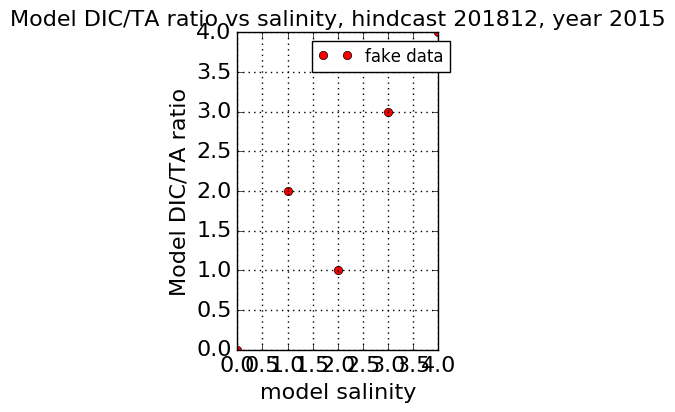

In [8]:
x = [0,1,2,3,4]
y = [0,2,1,3,4]
fig = plt.figure(figsize=(5,5))


for i in range(1,2):
    if i == 1:
        ax = fig.add_subplot(1,1,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_ylim(0,4)

        ax.plot(x,y,marker = 'o', color = 'red', label = 'fake data', linestyle = 'None')
        ax.set_xlabel('model salinity')
        ax.set_ylabel('Model DIC/TA ratio')
        plt.title('Model DIC/TA ratio vs salinity, hindcast 201812, year 2015')
        plt.legend(bbox_to_anchor=(1.1, 1.0))

        
        plt.tight_layout(rect=[0, 0.0, 1, 0.85])


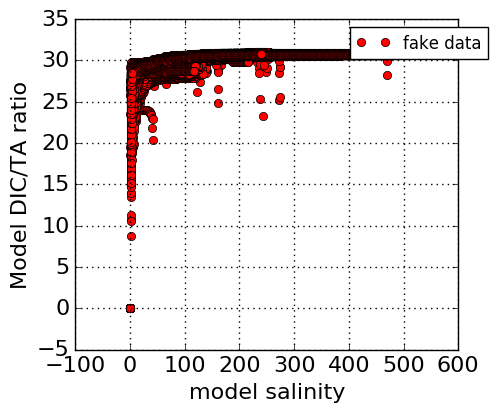

In [9]:
x = [0,1,2,3,4]
y = [0,2,1,3,4]
fig = plt.figure(figsize=(5,5))


for i in range(1,2):
    if i == 1:
        ax = fig.add_subplot(1,1,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        #ax.set_ylim(0,4)

        ax.plot(depths,sals,marker = 'o', color = 'red', label = 'fake data', linestyle = 'None')
        ax.set_xlabel('model salinity')
        ax.set_ylabel('Model DIC/TA ratio')
        #plt.title('Model DIC/TA ratio vs salinity, hindcast 201812, year 2015')
        plt.legend(bbox_to_anchor=(1.1, 1.0))

        
        plt.tight_layout(rect=[0, 0.0, 1, 0.85])


In [11]:
fc['dt']=[dt.datetime.strptime(i.split('.')[0],'%Y-%m-%d %H:%M:%S') for i in fc['Start time']]
dts=[pytz.timezone('Canada/Pacific').localize(dt.datetime.strptime(i.split('.')[0],'%Y-%m-%d %H:%M:%S')).astimezone(pytz.utc).replace(tzinfo=None)
        for i in fc['Start time']]
fc['dtUTC']=dts
dloc=[dt.datetime(i.year,i.month,i.day) for i in fc['dt']]
fc['dloc']=dloc